In [1]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
from copy import copy

In [2]:
# Parametros iniciales.
n = 5
mag = 1

In [3]:
def or_dot(n): # Espacio entre particulas. (posicion inicial de cada particula)
    dot = []
    for i in range(0,n):
        dot.append(i+0.5)
    return dot

b = or_dot(n)
b

[0.5, 1.5, 2.5, 3.5, 4.5]

In [4]:
def MC_step(config, beta): # Monte Carlo Metropolis
    '''Monte Carlo move using Metropolis algorithm '''
    configNew = copy(config)
    L = len(config)
    for i in range(L):
        for j in range(L):
            a = np.random.randint(0, L) # looping over i & j therefore use a & b
            b = np.random.randint(0, L)
            sigma =  config[a, b]
            #print(sigma)
            neighbors = config[(a+1)%L, b] + config[a, (b+1)%L] + config[(a-1)%L, b] + config[a, (b-1)%L]
            #print(neighbors)
            del_E = 2*sigma*neighbors
            if del_E < 0:
                sigma *= -1
            elif np.random.rand() < np.exp(-del_E*beta):
                sigma *= -1
            configNew[a, b] = sigma
            #config[a, b] = sigma
    return configNew

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[-1.  1.  1. -1. -1.]
 [-1. -1.  1.  1.  1.]
 [ 1. -1.  1.  1.  1.]
 [-1.  1.  1.  1. -1.]
 [-1.  1.  1.  1. -1.]]
[[-1.  1.  1.  1. -1.]
 [-1.  1.  1.  1. -1.]
 [ 1. -1.  1.  1.  1.]
 [-1. -1.  1.  1.  1.]
 [-1.  1.  1. -1. -1.]]


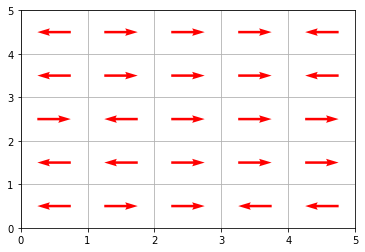

In [5]:
i0 = np.zeros([n,n]) # Configuracion inicial
print(i0)
for i in range(n):
    for j in range(n):
        origin = np.array([b[i],b[j]])
        rand = np.random.randint(0,360)
        rand = np.random.choice([0,180])
        eta = rand*np.pi/180
        V = np.array([[mag*np.cos(eta) , mag*np.sin(eta)]])
        i0[j][i] = V[0][0]
        plt.quiver(*origin, V[:,0], V[:,1], color=['r','b','g'], scale=n*2, pivot='mid')
        continue
print(i0)    
i0 = np.flip(i0,axis=0)
print(i0)
plt.ylim(0,n)
plt.xlim(0,n)
plt.grid()
plt.show()

In [6]:
print(i0)

[[-1.  1.  1.  1. -1.]
 [-1.  1.  1.  1. -1.]
 [ 1. -1.  1.  1.  1.]
 [-1. -1.  1.  1.  1.]
 [-1.  1.  1. -1. -1.]]


In [7]:
np.sum(i0)

5.0

In [80]:
T = 0.005 # si T es muy grande, se desordena los momentos, si es muy pequeño se ordena
i0evol = MC_step(i0,1/T)
print(i0evol)

[[-1. -1. -1.  1. -1.]
 [-1.  1.  1. -1. -1.]
 [ 1. -1.  1. -1.  1.]
 [-1.  1.  1. -1. -1.]
 [ 1.  1.  1.  1.  1.]]


In [88]:
print(i0evol)
i0evol2 = MC_step(i0evol,1/T)
i0evol3 = MC_step(i0evol2,1/T)
i0evol4 = MC_step(i0evol3,1/T)
i0evol5 = MC_step(i0evol4,1/T)
i0evol6 = MC_step(i0evol5,1/T)
i0evol7 = MC_step(i0evol6,1/T)
i0evol8 = MC_step(i0evol7,1/T)
i0evol9 = MC_step(i0evol8,1/T)
i0evol10 = MC_step(i0evol9,1/T)
print(i0evol9)

[[-1. -1. -1.  1. -1.]
 [-1.  1.  1. -1. -1.]
 [ 1. -1.  1. -1.  1.]
 [-1.  1.  1. -1. -1.]
 [ 1.  1.  1.  1.  1.]]
[[-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]]


[[ 1.  1. -1.  1. -1.]
 [-1. -1. -1. -1.  1.]
 [ 1.  1. -1. -1. -1.]
 [-1.  1.  1. -1. -1.]
 [-1.  1.  1.  1.  1.]]


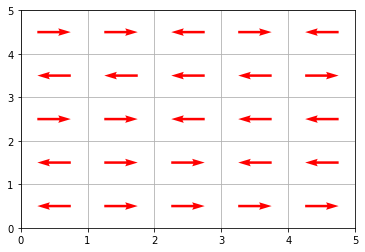

In [67]:
for i in range(n):
    for j in range(n):
        origin = np.array([b[i],b[j]])
        vtemp = i0evol[i][j]
        if vtemp == 1:
            rand = 0
        elif vtemp == -1:
            rand = 180
        eta = rand*np.pi/180
        V = np.array([[vtemp,mag*np.sin(eta)]])
        plt.quiver(*origin, V[:,0], V[:,1], color=['r','b','g'], scale=n*2,pivot='mid')
        continue
        
i0evol = np.flip(i0evol,axis=1).T
print(i0evol)   
plt.ylim(0,n)
plt.xlim(0,n)
plt.grid()
plt.show()

In [10]:
-1%5

4

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a5b801ab-9f0c-404a-9dde-9311e9311c9b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>